# APS 5 - Questões com auxílio do Pandas

** Nome: ** <font color=blue>Juan Jorge Garcia</font>


APS **INDIVIDUAL**

Data de Entrega: 26/Set até às 23h59 via GitHub.

Vamos trabalhar com dados do USGS (United States Geological Survey) para tentar determinar se os abalos detectados no hemisfério Norte têm grande probabilidade de serem testes nucleares.

In [1]:
%matplotlib inline
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import expon

In [2]:
#Abrir o arquivo
df = pd.read_csv('earthquake.csv')
#listar colunas
print(list(df))

['Date', 'Time', 'Latitude', 'Longitude', 'Type', 'Depth', 'Depth Error', 'Depth Seismic Stations', 'Magnitude', 'Magnitude Type', 'Magnitude Error', 'Magnitude Seismic Stations', 'Azimuthal Gap', 'Horizontal Distance', 'Horizontal Error', 'Root Mean Square', 'ID', 'Source', 'Location Source', 'Magnitude Source', 'Status']


## Liste as primeiras linhas do DataFrame

In [8]:
df.head(10)

,Date,Time,Latitude,Longitude,Type,Depth,Depth Error,Depth Seismic Stations,Magnitude,Magnitude Type,...,Magnitude Seismic Stations,Azimuthal Gap,Horizontal Distance,Horizontal Error,Root Mean Square,ID,Source,Location Source,Magnitude Source,Status
0,01/02/1965,13:44:18,19.246,145.616,Earthquake,131.6,NaN,NaN,6.0,MW,...,NaN,NaN,NaN,NaN,NaN,ISCGEM860706,ISCGEM,ISCGEM,ISCGEM,Automatic
1,01/04/1965,11:29:49,1.863,127.352,Earthquake,80.0,NaN,NaN,5.8,MW,...,NaN,NaN,NaN,NaN,NaN,ISCGEM860737,ISCGEM,ISCGEM,ISCGEM,Automatic
2,01/05/1965,18:05:58,-20.579,-173.972,Earthquake,20.0,NaN,NaN,6.2,MW,...,NaN,NaN,NaN,NaN,NaN,ISCGEM860762,ISCGEM,ISCGEM,ISCGEM,Automatic
3,01/08/1965,18:49:43,-59.076,-23.557,Earthquake,15.0,NaN,NaN,5.8,MW,...,NaN,NaN,NaN,NaN,NaN,ISCGEM860856,ISCGEM,ISCGEM,ISCGEM,Automatic
4,01/09/1965,13:32:50,11.938,126.427,Earthquake,15.0,NaN,NaN,5.8,MW,...,NaN,NaN,NaN,NaN,NaN,ISCGEM860890,ISCGEM,ISCGEM,ISCGEM,Automatic
5,01/10/1965,13:36:32,-13.405,166.629,Earthquake,35.0,NaN,NaN,6.7,MW,...,NaN,NaN,NaN,NaN,NaN,ISCGEM860922,ISCGEM,ISCGEM,ISCGEM,Automatic
6,01/12/1965,13:32:25,27.357,87.867,Earthquake,20.0,NaN,NaN,5.9,MW,...,NaN,NaN,NaN,NaN,NaN,ISCGEM861007,ISCGEM,ISCGEM,ISCGEM,Automatic
7,01/15/1965,23:17:42,-13.309,166.212,Earthquake,35.0,NaN,NaN,6.0,MW,...,NaN,NaN,NaN,NaN,NaN,ISCGEM861111,ISCGEM,ISCGEM,ISCGEM,Automatic
8,01/16/1965,11:32:37,-56.452,-27.043,Earthquake,95.0,NaN,NaN,6.0,MW,...,NaN,NaN,NaN,NaN,NaN,ISCGEMSUP861125,ISCGEMSUP,ISCGEM,ISCGEM,Automatic
9,01/17/1965,10:43:17,-24.563,178.487,Earthquake,565.0,NaN,NaN,5.8,MW,...,NaN,NaN,NaN,NaN,NaN,ISCGEM861148,ISCGEM,ISCGEM,ISCGEM,Automatic


## Q1 - Manipulando o DataFrame

Crie uma coluna chamada `Hemisfério` baseada na Latitude

A regra de formação é a seguinte:

Valor | Critério
---|---
Norte | Latitude positiva
Sul | Latitude negativa

In [10]:
df.loc[(df.Latitude>=0),"Hemisfério"] = "Norte"
df.loc[(df.Latitude<=0),"Hemisfério"] = "Sul"

## Q2 - Fit e Histograma

Faça o Histograma da Magnitude. Interprete.

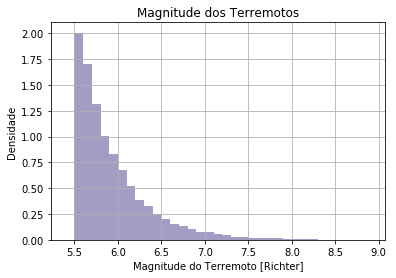

In [149]:
faixa = np.arange(5.4,9,.1)
mag= pd.cut(df.Magnitude,faixa)
#sal_min.value_counts()
plot = df.Magnitude.plot.hist(bins=faixa,title="Magnitude dos Terremotos", normed = 1,color="darkslateblue",alpha=0.5)
plt.xlabel("Magnitude do Terremoto [Richter]")
plt.ylabel("Densidade")
plt.grid(True)

De acordo com o histograma, percebe-se que a magnitude dos terremotos se comporta como um gráfico de uma exponencial = b^x, sendo (0<b>1). Assim, ve-se que terremotos de grandes magnitudes são ocorrências bem raras na história.

Faça o fit de uma distribuição exponencial sobre os dados da Magnitude, achando os valores de **loc** e **scale**. Interprete loc e scale no caso da exponencial.
Documentação: https://docs.scipy.org/doc/scipy/reference/generated/scipy.stats.expon.html

In [150]:
df.Magnitude.describe()

count    23412.000000
mean         5.882531
std          0.423066
min          5.500000
25%          5.600000
50%          5.700000
75%          6.000000
max          9.100000
Name: Magnitude, dtype: float64

Refaça o Histograma plotando a fdp (função densidade de probabilidade) da exponencial com os parâmetros achados no fit em cima. Cuidado com o domínio utilizado. Interprete.

média:  [ 7.   6.8  7.2 ...,  6.9  7.3  6.5]  vs  5.882530753460003
dp:  0.5  vs  0.4230656393157772


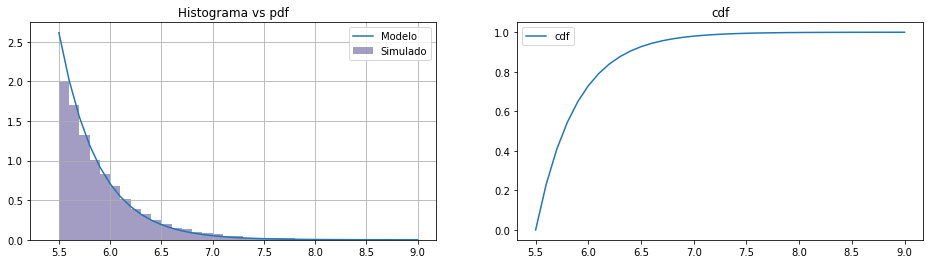

In [154]:
#Validando os valores da saída:
print('média: ', mu, ' vs ', df.Magnitude.mean())
print('dp: ', sigma, ' vs ', df.Magnitude.std())

#Plots
fig, ax = plt.subplots(1, 2, figsize = (16,4))

exp=expon.fit(df.Magnitude)

#Histograma vs pdf
ax[0].hist(df.Magnitude, normed = True,bins=faixa,color="darkslateblue",alpha=0.5)
x = np.arange(df.Magnitude.min(), df.Magnitude.max(), 0.1)
ax[0].plot(x, expon.pdf(x, loc=exp[0], scale=exp[1]))
ax[0].set_title('Histograma vs pdf')
ax[0].legend(['Modelo', 'Simulado'])
ax[0].grid(True)

#Cumulative Distribution Function - cdf
ax[1].plot(x, expon.cdf(x, loc=exp[0], scale=exp[1]))
ax[1].set_title('cdf')
ax[1].legend(['cdf'])



Comparando o histograma com a pdf, percebe-se, nitidamente, a semelhança entre os dois gráficos, ou seja, a distribuição de magnitude de terremotos se assemelha muito a uma função exponencial

## Q3 - Tabela cruzada

Faça uma tabela de cruzamento das variáveis `Hemisfério` e `Type`

Sua tabela deve ser <font color=red> normalizada</font>

In [171]:
ct = pd.crosstab(df["Hemisfério"], df.Type,normalize=True)
ct



Type,Earthquake,Explosion,Nuclear Explosion,Rock Burst
Hemisfério,,,,
Norte,0.447121,0.000085,0.006279,0.000000
Sul,0.545191,0.000085,0.001196,0.000043


### Q3.1 - Qual a probabilidade de ocorrer um terremoto no hemisfério norte?

Adicione na célula abaixo o cálculo:

In [177]:


equake_prob= ct.loc["Norte","Earthquake"] + ct.loc["Sul","Earthquake"] 
n_equake_prob=ct.loc["Norte","Earthquake"]/equake_prob
s_equake_prob=ct.loc["Sul","Earthquake"]/equake_prob
n_equake_prob

0.45058539944903586

Explique o seu raciocínio

A probalidade de um terremo acontecer no hemisferio norte será a probabilidade de acontecer um terremoto no norte (north_prob) dividido pela a probabilidade de ser um terremoto (north_prob + south_prob)

### Q3.2 - Dado que aconteceu no Norte, qual a probabilidade de ele ter sido `Nuclear Explosion`? 

Calcule a resposta abaixo, ou explique como a encontrou

Se for cálculo preencha a célula a seguir:

In [186]:
north_prob=ct.T.loc[:,"Norte"] #calculando a prob total de acontecer no norte
nu_north=ct.T.loc["Nuclear Explosion","Norte"]
prob_nu_north=nu_north/north_prob.sum()

prob_nu_north

0.013845719129697655

Se conseguir obter a resposta sem calcular, insira a resposta abaixo:

* A probabilidade de ter sido `Nuclear Explosion` é ...

## Q4 - Análise bivariada

Faça o *plot* de dispersão (*scatter plot*) entre as variáveis `Magnitude Error`  e `Depth`

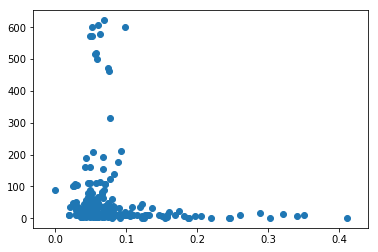

In [187]:
plt.scatter(df["Magnitude Error"],df.Depth)

Calcule a correlação entre as variáveis `Magnitude Error`  e `Depth`

In [191]:
df.corr().loc["Depth","Magnitude Error"]

-0.076918438923387164

Explique o que significa o valor da correlação calculada acima? 

A correlação calculada confirma o que o grafico nos mostra. As duas variáveis possuem pouquíssima correlação, pois esta, está muito próxima de 0. A correlação só é alta, quando esta se aproxima de 1 ou -1.

## Q5 - Describe e boxplot

Faça o `describe` e o *boxplot* da `Latitude` e da `Longitude`. Explique os valores

In [201]:
print("latitude: ",df.Latitude.describe(),"Longitude: ",df.Longitude.describe())

latitude:  count    23412.000000
mean         1.679033
std         30.113183
min        -77.080000
25%        -18.653000
50%         -3.568500
75%         26.190750
max         86.005000
Name: Latitude, dtype: float64 Longitude:  count    23412.000000
mean        39.639961
std        125.511959
min       -179.997000
25%        -76.349750
50%        103.982000
75%        145.026250
max        179.998000
Name: Longitude, dtype: float64


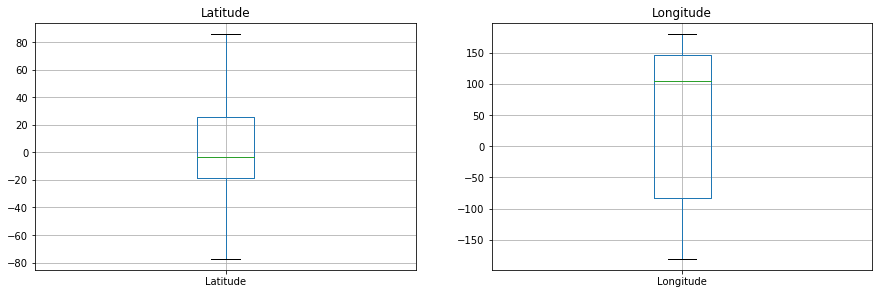

In [198]:
fig = plt.figure(figsize=(15,10))


#latitude
plt.subplot(221)
df.Latitude.describe()
quantils=df.Latitude.quantile(np.arange(0,1.1,.1))
quantils.plot(kind="box",grid=True)
plt.title("Latitude")

#longitude
plt.subplot(222)
df.Longitude.describe()
quantils=df.Longitude.quantile(np.arange(0,1.1,.1))
quantils.plot(kind="box",grid=True)
plt.title("Longitude")

Esses dados (boxplot e describes) nos ajudam a saber em qual parte do globo ocorre mais abalos sismicos (hemisferio norte/sul e hemisferio oriental/ocidental)

## Q6 - Tirando conclusões com base nos dados

Em um certo lugar já ocorreram abalos com *Magnitude Type* `MB` e *Type* `Nuclear Explosion`. 
 
Responda: 
    * É mais provável que tenha sido no norte ou no sul? 
    
Assuma que os Magnitude Type e Type são independentes


In [227]:
ct1 = pd.crosstab(df["Magnitude Type"],[df.Type,df["Hemisfério"]],normalize=True)
ct1


Type           Earthquake           Explosion           Nuclear Explosion  \
Hemisfério          Norte       Sul     Norte       Sul             Norte   
Magnitude Type                                                              
MB               0.066086  0.087445  0.000085  0.000085          0.005767   
MD               0.000256  0.000000  0.000000  0.000000          0.000000   
MH               0.000214  0.000000  0.000000  0.000000          0.000000   
ML               0.002777  0.000000  0.000000  0.000000          0.000513   
MS               0.032722  0.039985  0.000000  0.000000          0.000000   
MW               0.157375  0.172498  0.000000  0.000000          0.000000   
MWB              0.047503  0.057499  0.000000  0.000000          0.000000   
MWC              0.102055  0.140074  0.000000  0.000000          0.000000   
MWR              0.000513  0.000598  0.000000  0.000000          0.000000   
MWW              0.037550  0.047161  0.000000  0.000000          0.000000   

Type                     Rock Burst  
Hemisfério           Sul        Sul  
Magnitude Type                       
MB              0.001196   0.000000  
MD              0.000000   0.000000  
MH              0.000000   0.000000  
ML              0.000000   0.000000  
MS              0.000000   0.000000  
MW              0.000000   0.000000  
MWB             0.000000   0.000000  
MWC             0.000000   0.000043  
MWR             0.000000   0.000000  
MWW             0.000000   0.000000

In [231]:
intsec=ct1.loc["MB","Nuclear Explosion"]
prob_N=intsec[0]/intsec.sum()
print(prob_N)

intsec=ct1.loc["MB","Nuclear Explosion"]
prob_S=intsec[1]/intsec.sum()
print(prob_S)

0.828220858896
0.171779141104


In [ ]:
Dado as condições (abalos com Magnitude Type MB e Type Nuclear Explosion.), é mais provavel que tenha ocorrido no norte,
pois a probabilidade de ocorrer no Norte é de 0.83 e a de ocorrer no sul é de 0.17, aproximadamente.